In [ ]:
import numpy as np # 벡터, 행렬 등 수치 연산을 수행하는 선형대수 라이브러리
import pandas as pd # 시리즈, 데이터프레임 포맷 데이터 처리를 위한 라이브러리
import warnings; warnings.filterwarnings(action='ignore') # 경고 메시지 무시
import matplotlib.pyplot as plt # 데이터 시각화 라이브러리
import pickle # 객체 입출력을 위한 라이브러리
from sklearn.model_selection import train_test_split # 훈련 데이터, 테스트 데이터 분리
from sklearn.preprocessing import StandardScaler # 정규화
from sklearn.ensemble import RandomForestClassifier as RFC # 랜덤포레스트 분류 알고리즘
from sklearn.tree import DecisionTreeClassifier as DTC # 의사결정나무 분류 알고리즘
from sklearn.ensemble import GradientBoostingClassifier as GBC # 그래디언트 부스팅 분류 알고리즘
# 모델 평가를 위한 metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import os
import matplotlib.pyplot as plt


# Mac OS의 경우와 그 외 OS의 경우로 나누어 설정

if os.name == 'posix':

    plt.rc("font", family="AppleGothic")

else :

    plt.rc("font", family="Malgun Gothic")

In [ ]:
df1= pd.read_csv('./GP_통합(3years)_ver3_원핫_취업예측용.csv')
df2 = pd.read_csv('./GP_통합(3years)_ver2_취업예측용.csv')

### Boxplot을 활용한 이상치 확인

In [ ]:
def boxplot_vis(data, target_name):
    plt.figure(figsize=(30, 30))
    for col_idx in range(len(data.columns)):
        # 6행 2열 서브플롯에 각 feature 박스플롯 시각화
        plt.subplot(9, 2, col_idx+1)
        # flierprops: 빨간색 다이아몬드 모양으로 아웃라이어 시각화
        plt.boxplot(data[data.columns[col_idx]], flierprops = dict(markerfacecolor = 'r', marker = 'D'))
        # 그래프 타이틀: feature name
        plt.title("Feature" + "(" + target_name + "):" + data.columns[col_idx], fontsize = 20)
#     plt.savefig('../figure/boxplot_' + target_name + '.png')
    plt.show()

### 이상치 제거  -> 연령 이상치는 제거하는 것이 좋아보임

In [ ]:
def remove_outlier(input_data):
    q1 = input_data.quantile(0.25) # 제 1사분위수
    q3 = input_data.quantile(0.75) # 제 3사분위수
    iqr = q3 - q1 # IQR(Interquartile range) 계산
    minimum = q1 - (iqr * 1.5) # IQR 최솟값
    maximum = q3 + (iqr * 1.5) # IQR 최댓값
    # IQR 범위 내에 있는 데이터만 산출(IQR 범위 밖의 데이터는 이상치)
    df_removed_outlier = input_data[(minimum < input_data) & (input_data < maximum)]
    return df_removed_outlier

In [ ]:
y1 = df1['취업여부']
X1 = df1.drop(columns=['취업여부'])

In [ ]:
# 수치형만 따로 확인



X1_float = X1[['연령',
'가정의 경제적 지원',
'진로 선택 및 취업준비 프로그램 참여 횟수',
'GPA',
'학자금대출 금액',
'휴학 횟수',
'희망연봉',
'구직기간',
'일자리 지원 횟수',
'면접 횟수',
'합격 제의 횟수',
'구직기간(주)',
'운동시간(주)',
'수면시간(일)',
'일자리 횟수',
'교육훈련횟수',
'시간총합',
'토익']]

X1_float.head()

,연령,가정의 경제적 지원,진로 선택 및 취업준비 프로그램 참여 횟수,GPA,학자금대출 금액,휴학 횟수,희망연봉,구직기간,일자리 지원 횟수,면접 횟수,합격 제의 횟수,구직기간(주),운동시간(주),수면시간(일),일자리 횟수,교육훈련횟수,시간총합,토익
0,23,0,3,73.33,0,0,2000,0,0,0,0,0,5,10,1,0,0,0
1,21,0,7,66.67,0,0,2400,0,0,0,0,0,12,8,0,1,240,0
2,21,40,2,95.56,0,0,2000,0,0,0,0,0,2,8,0,0,0,800
3,25,0,1,84.44,0,1,3600,0,0,0,0,13,1,4,0,0,0,0
4,21,0,3,91.11,0,0,2200,0,0,0,0,0,3,8,2,0,0,0


In [ ]:
X1_float.shape

(51690, 18)

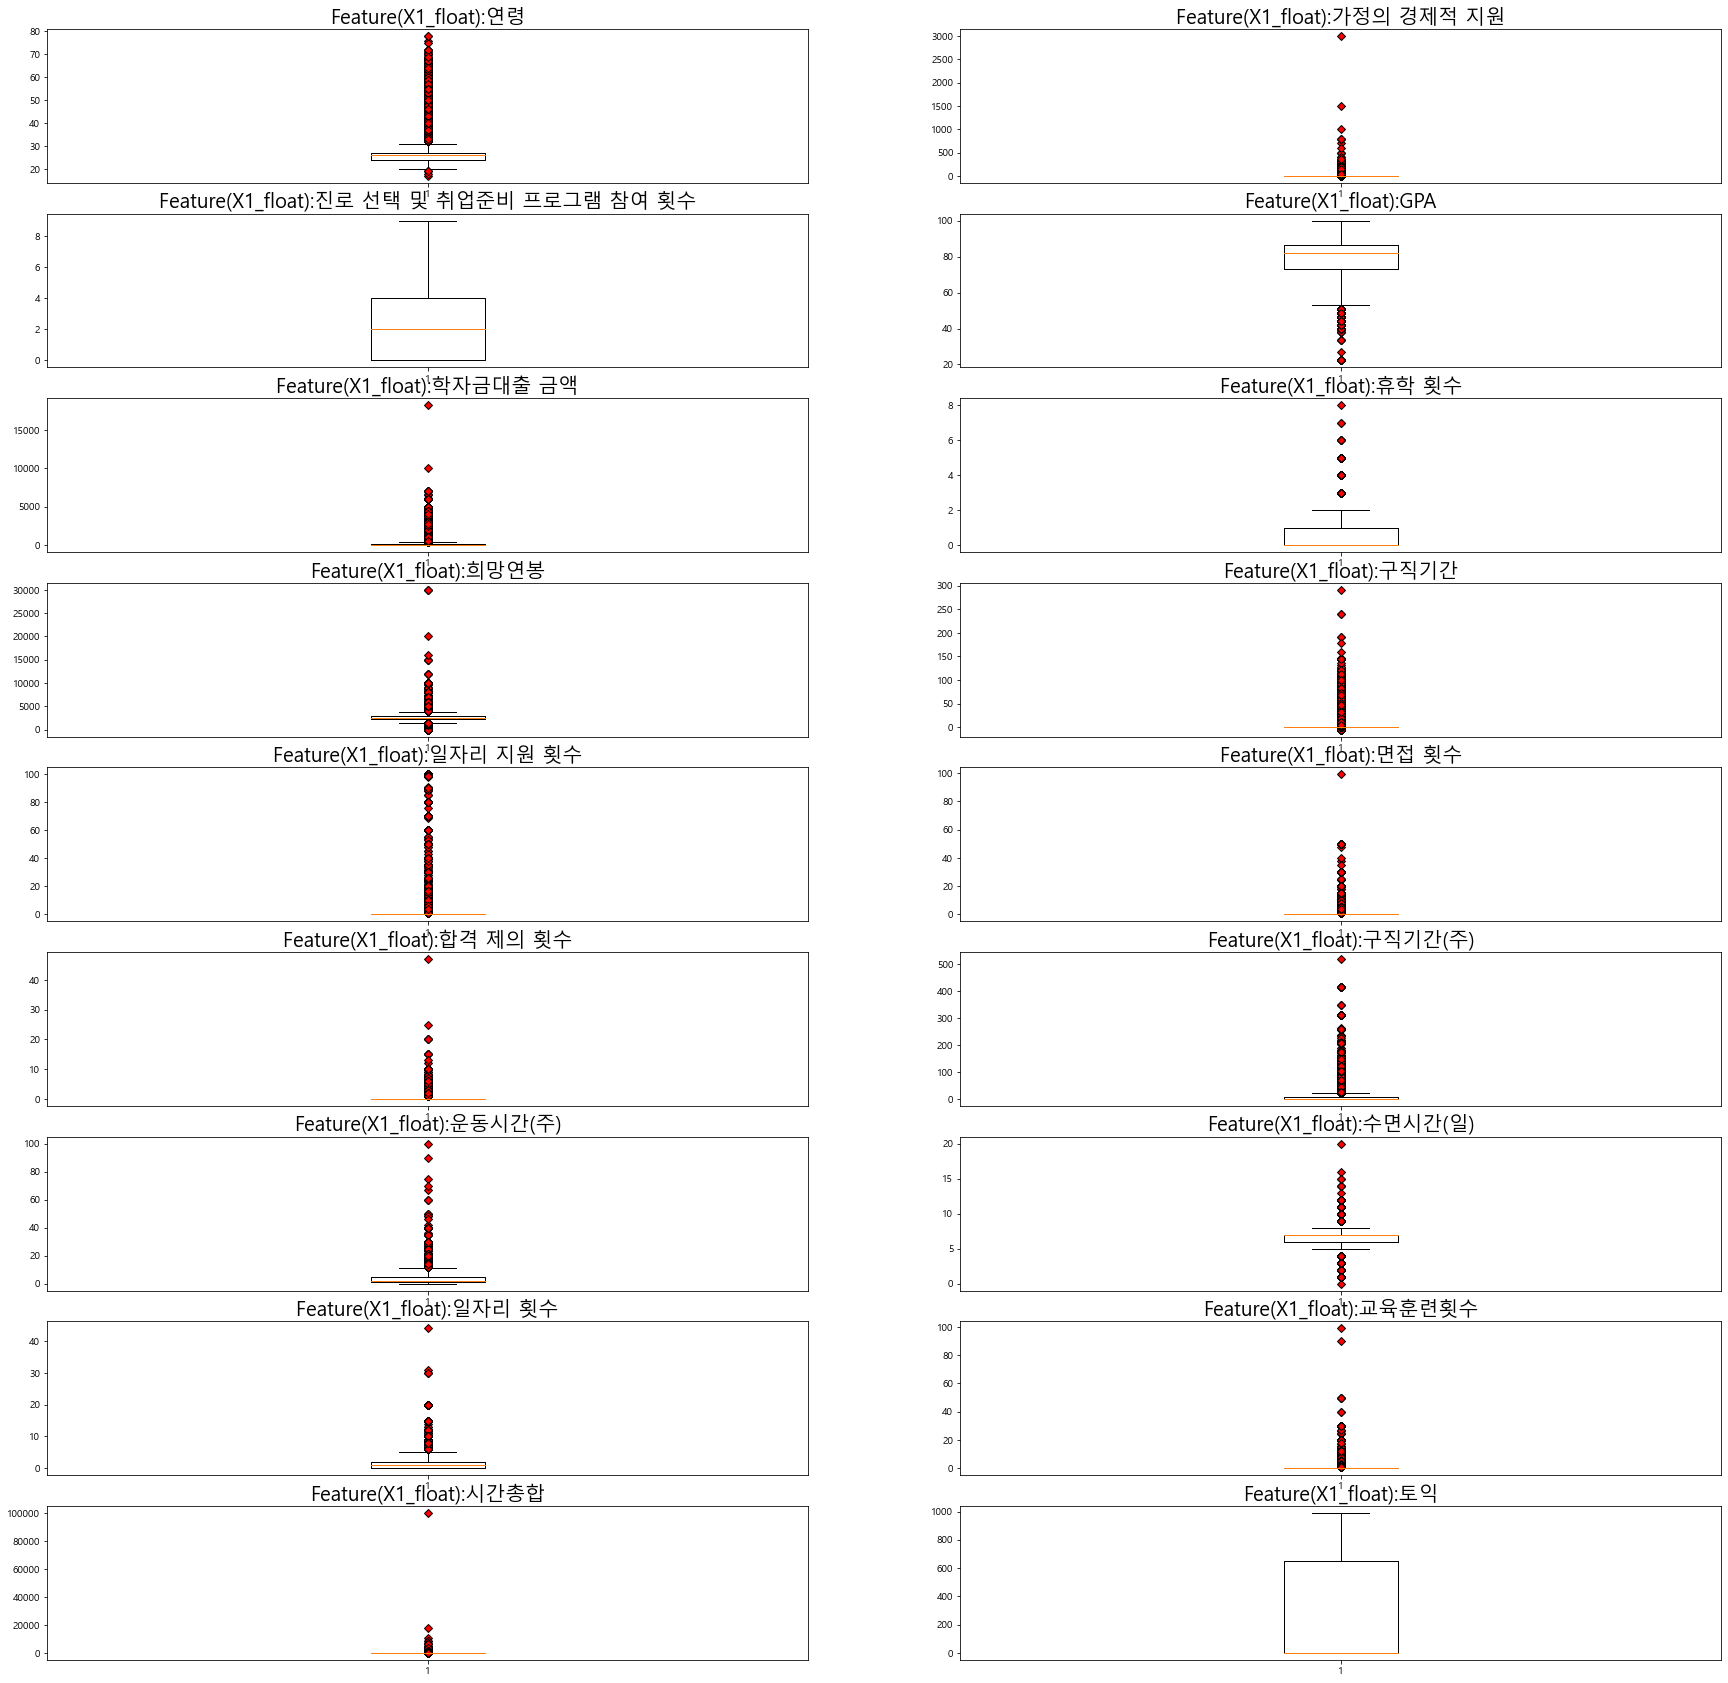

In [ ]:
boxplot_vis(X1_float, 'X1_float')

In [ ]:
X_float_prep = remove_outlier(X_float)
X_float_prep.isnull().sum()

연령                          2122
가정의 경제적 지원                 51690
진로 선택 및 취업준비 프로그램 참여 횟수        0
GPA                          395
학자금대출 금액                   10805
휴학 횟수                        686
희망연봉                        6281
구직기간                       51690
일자리 지원 횟수                  51690
면접 횟수                      51690
합격 제의 횟수                   51690
구직기간(주)                     7592
운동시간(주)                     1367
수면시간(일)                     2662
일자리 횟수                      1876
교육훈련횟수                     51690
시간총합                       51690
토익                             0
dtype: int64

In [ ]:
# 이상치 제거 안하고 그냥 진행

In [ ]:
from imblearn.over_sampling import SMOTE



X1_train_basic , x1_test , y1_train_basic, y1_test = train_test_split(X1, y1 , test_size=0.3 , random_state=0 , stratify=y)

smote = SMOTE(random_state=0)
x1_train , y1_train = smote.fit_resample(X1_train_basic, y1_train_basic)

In [ ]:
y2 = df2['취업여부']
X2 = df2.drop(columns=['취업여부'])

In [ ]:
X2_train_basic , x2_test , y2_train_basic, y2_test = train_test_split(X2, y2 , test_size=0.3 , random_state=0 , stratify=y)

smote = SMOTE(random_state=0)
x2_train , y2_train = smote.fit_resample(X2_train_basic, y2_train_basic)

# Classifier 모델링 함수

## 기본 모델 학습 함수

In [ ]:
def modeling_uncustomized (algorithm, x_train, y_train, x_test, y_test):
    # 하이퍼파라미터 조정 없이 모델 학습
    uncustomized = algorithm(random_state=1234)
    uncustomized.fit(x_train, y_train)
    # Train Data 설명력
    train_score_before = uncustomized.score(x_train, y_train).round(3)
    print(f"학습 데이터셋 정확도: {train_score_before}")
    # Test Data 설명력
    test_score_before = uncustomized.score(x_test, y_test).round(3)
    print(f"테스트 데이터셋 정확도: {test_score_before}")
    return train_score_before, test_score_before

## 하이퍼파라미터별 모델 성능 시각화 함수

In [ ]:
def optimi_visualization(algorithm_name, x_values, train_score, test_score, xlabel, filename):
    # 하이퍼파라미터 조정에 따른 학습 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, train_score, linestyle = '-', label = 'train score')
    # 하이퍼파라미터 조정에 따른 테스트 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, test_score, linestyle = '--', label = 'test score')
    plt.ylabel('Accuracy(%)') # y축 라벨
    plt.xlabel(xlabel) # x축 라벨
    plt.legend() # 범례표시
#     plt.savefig('../figure/' + algorithm_name + '_' + filename + '.png') # 시각화한 그래프는 로컬에 저장

## 모델 최적화 함수: 학습할 트리 모델 개수 선정

In [ ]:
def optimi_estimator(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_estimator_min, n_estimator_max):
    train_score = []; test_score =[]
    para_n_tree = [n_tree*5 for n_tree in range(n_estimator_min, n_estimator_max)]

    for v_n_estimators in para_n_tree:
        model = algorithm(n_estimators = v_n_estimators, random_state=1234)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 트리 개수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'n_estimators': para_n_tree, 'TrainScore': train_score, 'TestScore': test_score})
    # 트리 개수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_n_tree, train_score, test_score, "The number of estimator", "n_estimator")
    print(round(df_score_n, 4))

## 모델 최적화 함수: 최대 깊이 선정

In [ ]:
def optimi_maxdepth (algorithm, algorithm_name, x_train, y_train, x_test, y_test, depth_min, depth_max, n_estimator):
    train_score = []; test_score = []
    para_depth = [depth for depth in range(depth_min, depth_max)]

    for v_max_depth in para_depth:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(max_depth = v_max_depth,
                              random_state=1234)
        else:
            model = algorithm(max_depth = v_max_depth,
                              n_estimators = n_estimator,
                              random_state=1234)
        
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 최대 깊이에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'depth': para_depth, 'TrainScore': train_score, 'TestScore': test_score})
    # 최대 깊이에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_depth, train_score, test_score, "The number of depth", "n_depth")
    print(round(df_score_n, 4))

## 모델 최적화 함수: 분리 노드의 최소 자료 수 선정

In [ ]:
def optimi_minsplit (algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_split_min, n_split_max, n_estimator, n_depth):
    train_score = []; test_score = []
    para_split = [n_split*2 for n_split in range(n_split_min, n_split_max)]
    for v_min_samples_split in para_split:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(min_samples_split = v_min_samples_split,
                              max_depth = n_depth,
                              random_state = 1234)
        else:
            model = algorithm(min_samples_split = v_min_samples_split,
                              n_estimators = n_estimator,
                              max_depth = n_depth,
                              random_state = 1234)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 분리 노드의 최소 자료 수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'min_samples_split': para_split, 'TrainScore': train_score, 'TestScore': test_score})
    # 분리 노드의 최소 자료 수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_split, train_score, test_score, "The minimum number of samples required to split an internal node", "min_samples_split")
    print(round(df_score_n, 4))

## 모델 최적화 함수: 잎사귀 노드의 최소 자료 수 선정

In [ ]:
def optimi_minleaf(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split):
    train_score = []; test_score = []
    para_leaf = [n_leaf*2 for n_leaf in range(n_leaf_min, n_leaf_max)]

    for v_min_samples_leaf in para_leaf:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(min_samples_leaf = v_min_samples_leaf,
                                        max_depth = n_depth,
                                        min_samples_split = n_split,
                                        random_state=1234)
        else:
            model = algorithm(min_samples_leaf = v_min_samples_leaf,
                                n_estimators = n_estimator,
                                max_depth = n_depth,
                                min_samples_split = n_split,
                                random_state=1234)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 잎사귀 노드의 최소 자료 수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'min_samples_leaf': para_leaf, 'TrainScore': train_score, 'TestScore': test_score})
    # 잎사귀 노드의 최소 자료 수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_leaf, train_score, test_score, "The minimum number of samples required to be at a leaf node", "min_samples_leaf")
    print(round(df_score_n, 4))

## 최종 모델 학습

In [ ]:
def model_final(algorithm, algorithm_name, feature_name, x_train, y_train, x_test, y_test, n_estimator, n_depth, n_split, n_leaf):
    # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
    if algorithm == DTC:
        model = algorithm(random_state=1234, 
                          min_samples_leaf = n_leaf,
                          min_samples_split = n_split, 
                          max_depth = n_depth)
    else:
        model = algorithm(random_state = 1234, 
                          n_estimators = n_estimator, 
                          min_samples_leaf = n_leaf,
                          min_samples_split = n_split, 
                          max_depth = n_depth)
    # 모델 학습
    model.fit(x_train, y_train)
    # 모델 저장
    model_path = '../model/'
    model_filename = 'wine_classification_' + algorithm_name + '.pkl'
    with open(model_path + model_filename, 'wb') as f:
        pickle.dump(model, f)
    print(f"최종 모델 저장 완료! 파일 경로: {model_path + model_filename}\n")
    
    # 최종 모델의 성능 평가
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    y_pred = model.predict(x_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}") # 정확도
    print(f"Precision: {precision_score(y_test, y_pred):.3f}") # 정밀도
    print(f"Recall: {recall_score(y_test, y_pred):.3f}") # 재현율
    print(f"F1-score: {f1_score(y_test, y_pred):.3f}") # F1 스코어
    
    # 혼동행렬 시각화
    plt.figure(figsize =(30, 30))
    plot_confusion_matrix(model, 
                         x_test, y_test,
                         include_values = True,
                         display_labels = ['Red', 'White'], # 목표변수 이름
                         cmap = 'Pastel1') # 컬러맵
    plt.savefig('../figure/' + algorithm_name + '_confusion_matrix.png') # 혼동행렬 자료 저장
    plt.show()
    
    # 변수 중요도 산출
    dt_importance = pd.DataFrame()
    dt_importance['Feature'] = feature_name # 설명변수 이름
    dt_importance['Importance'] = model.feature_importances_ # 설명변수 중요도 산출

    # 변수 중요도 내림차순 정렬
    dt_importance.sort_values("Importance", ascending = False, inplace = True)
    print(dt_importance.round(3))
    # 변수 중요도 오름차순 정렬
    dt_importance.sort_values("Importance", ascending = True, inplace = True)
    # 변수 중요도 시각화
    coordinates = range(len(dt_importance)) # 설명변수 개수만큼 bar 시각화
    plt.barh(y = coordinates, width = dt_importance["Importance"])
    plt.yticks(coordinates, dt_importance["Feature"]) # y축 눈금별 설명변수 이름 기입
    plt.xlabel("Feature Importance") # x축 이름
    plt.ylabel("Features") # y축 이름
    plt.savefig('../figure/' + algorithm_name + '_feature_importance.png') # 변수 중요도 그래프 저장

# Random Forest Classifier 기반 분류 모델 성능 평가

In [ ]:
# 랜덤포레스트 분류 알고리즘
algorithm = RFC
algorithm_name = 'rfc'

## 기본 모델 학습

In [ ]:
train_acc_before, test_acc_before = modeling_uncustomized(algorithm, 
                                                          x1_train,
                                                          y1_train,
                                                          x1_test,
                                                          y1_test)

학습 데이터셋 정확도: 1.0
테스트 데이터셋 정확도: 1.0


### 해석

- 학습 데이터 기반 분류 모델의 정확도가 100%인 것으로 미루어 보아 과대적합이 발생한 것으로 보임
- 하이퍼파라미터 튜닝을 통해 과대적합을 방지할 수 있도록 조치가 필요함

## 모델 최적화: (1) 학습할 트리 개수 선정

    n_estimators  TrainScore  TestScore
0              5         1.0        1.0
1             10         1.0        1.0
2             15         1.0        1.0
3             20         1.0        1.0
4             25         1.0        1.0
5             30         1.0        1.0
6             35         1.0        1.0
7             40         1.0        1.0
8             45         1.0        1.0
9             50         1.0        1.0
10            55         1.0        1.0
11            60         1.0        1.0
12            65         1.0        1.0
13            70         1.0        1.0
14            75         1.0        1.0
15            80         1.0        1.0
16            85         1.0        1.0
17            90         1.0        1.0
18            95         1.0        1.0


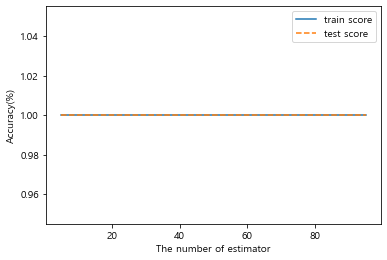

In [ ]:
# 원핫 인코딩 + SMOTE 사용

n_estimator_min = 1
n_estimator_max = 20
optimi_estimator(algorithm, algorithm_name, 
                 x1_train, y1_train, x1_test, y1_test, 
                 n_estimator_min, n_estimator_max)

    n_estimators  TrainScore  TestScore
0              5         1.0     0.9999
1             10         1.0     1.0000
2             15         1.0     1.0000
3             20         1.0     1.0000
4             25         1.0     1.0000
5             30         1.0     1.0000
6             35         1.0     1.0000
7             40         1.0     1.0000
8             45         1.0     1.0000
9             50         1.0     1.0000
10            55         1.0     1.0000
11            60         1.0     1.0000
12            65         1.0     1.0000
13            70         1.0     1.0000
14            75         1.0     1.0000
15            80         1.0     1.0000
16            85         1.0     1.0000
17            90         1.0     1.0000
18            95         1.0     1.0000
19           100         1.0     1.0000
20           105         1.0     1.0000
21           110         1.0     1.0000
22           115         1.0     1.0000
23           120         1.0     1.0000


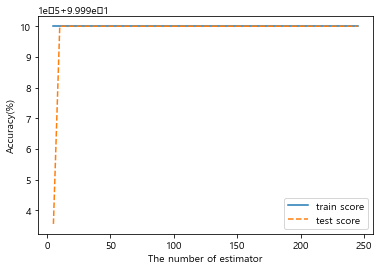

In [ ]:
# 원핫 인코딩만 사용


n_estimator_min = 1
n_estimator_max = 50
optimi_estimator(algorithm, algorithm_name, 
                 X1_train_basic, y1_train_basic, x1_test, y1_test, 
                 n_estimator_min, n_estimator_max)

    n_estimators  TrainScore  TestScore
0              5         1.0        1.0
1             10         1.0        1.0
2             15         1.0        1.0
3             20         1.0        1.0
4             25         1.0        1.0
5             30         1.0        1.0
6             35         1.0        1.0
7             40         1.0        1.0
8             45         1.0        1.0
9             50         1.0        1.0
10            55         1.0        1.0
11            60         1.0        1.0
12            65         1.0        1.0
13            70         1.0        1.0
14            75         1.0        1.0
15            80         1.0        1.0
16            85         1.0        1.0
17            90         1.0        1.0
18            95         1.0        1.0
19           100         1.0        1.0
20           105         1.0        1.0
21           110         1.0        1.0
22           115         1.0        1.0
23           120         1.0        1.0


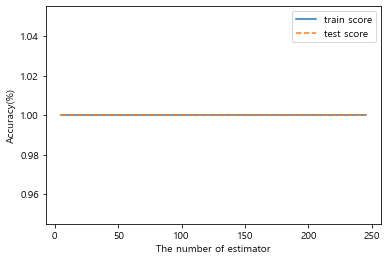

In [ ]:
# 기본 데이터

n_estimator_min = 1
n_estimator_max = 50
optimi_estimator(algorithm, algorithm_name, 
                 X2_train_basic, y2_train_basic, x2_test, y2_test, 
                 n_estimator_min, n_estimator_max)

    n_estimators  TrainScore  TestScore
0              5         1.0        1.0
1             10         1.0        1.0
2             15         1.0        1.0
3             20         1.0        1.0
4             25         1.0        1.0
5             30         1.0        1.0
6             35         1.0        1.0
7             40         1.0        1.0
8             45         1.0        1.0
9             50         1.0        1.0
10            55         1.0        1.0
11            60         1.0        1.0
12            65         1.0        1.0
13            70         1.0        1.0
14            75         1.0        1.0
15            80         1.0        1.0
16            85         1.0        1.0
17            90         1.0        1.0
18            95         1.0        1.0


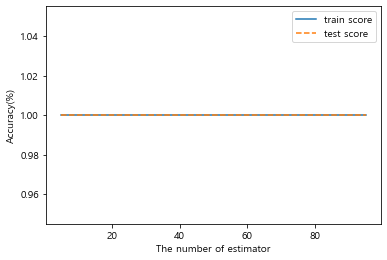

In [ ]:
# 기본 데이터 + SMOTE 사용

n_estimator_min = 1
n_estimator_max = 20
optimi_estimator(algorithm, algorithm_name, 
                 x2_train, y2_train, x2_test, y2_test, 
                 n_estimator_min, n_estimator_max)

## 모델 최적화: (2) 최대 깊이

    depth  TrainScore  TestScore
0       1      0.9925     0.9874
1       2      0.9926     0.9864
2       3      0.9994     0.9988
3       4      0.9988     0.9978
4       5      0.9997     0.9995
5       6      1.0000     1.0000
6       7      1.0000     0.9999
7       8      1.0000     1.0000
8       9      1.0000     1.0000
9      10      1.0000     1.0000
10     11      1.0000     1.0000
11     12      1.0000     1.0000
12     13      1.0000     1.0000
13     14      1.0000     1.0000
14     15      1.0000     1.0000
15     16      1.0000     1.0000
16     17      1.0000     1.0000
17     18      1.0000     1.0000
18     19      1.0000     1.0000
19     20      1.0000     1.0000


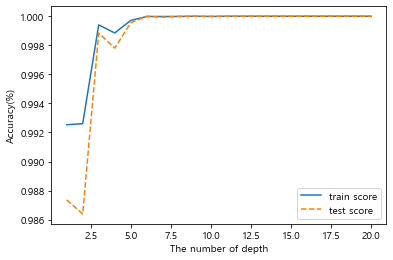

In [ ]:
# 원핫 인코딩 + SMOTE 사용 
# max_depth => 3이 좋아보임


depth_min = 1
depth_max = 21
optimi_maxdepth(algorithm, algorithm_name, 
                x1_train, y1_train, x1_test, y1_test, 
                depth_min, depth_max, 10)

    depth  TrainScore  TestScore
0       1      0.8495     0.8503
1       2      0.8496     0.8506
2       3      0.9682     0.9717
3       4      0.9999     0.9999
4       5      0.9998     0.9997
5       6      0.9999     0.9999
6       7      0.9999     0.9998
7       8      1.0000     1.0000
8       9      1.0000     1.0000
9      10      1.0000     1.0000
10     11      1.0000     1.0000
11     12      1.0000     1.0000
12     13      1.0000     1.0000
13     14      1.0000     1.0000
14     15      1.0000     1.0000
15     16      1.0000     1.0000
16     17      1.0000     1.0000
17     18      1.0000     1.0000
18     19      1.0000     1.0000
19     20      1.0000     1.0000


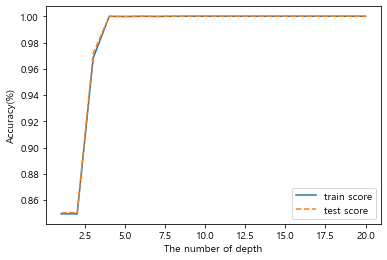

In [ ]:
# 원핫 인코딩


depth_min = 1
depth_max = 21
optimi_maxdepth(algorithm, algorithm_name, 
                X1_train_basic, y1_train_basic, x1_test, y1_test, 
                depth_min, depth_max, 10)

    depth  TrainScore  TestScore
0       1      0.8497     0.8506
1       2      1.0000     1.0000
2       3      1.0000     1.0000
3       4      1.0000     1.0000
4       5      1.0000     1.0000
5       6      1.0000     1.0000
6       7      1.0000     1.0000
7       8      1.0000     1.0000
8       9      1.0000     1.0000
9      10      1.0000     1.0000
10     11      1.0000     1.0000
11     12      1.0000     1.0000
12     13      1.0000     1.0000
13     14      1.0000     1.0000
14     15      1.0000     1.0000
15     16      1.0000     1.0000
16     17      1.0000     1.0000
17     18      1.0000     1.0000
18     19      1.0000     1.0000
19     20      1.0000     1.0000


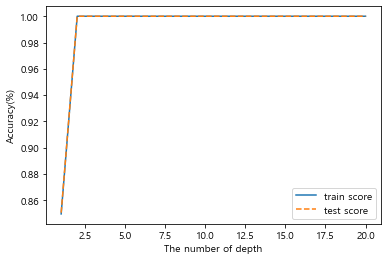

In [ ]:
# 기본 데이터



depth_min = 1
depth_max = 21
optimi_maxdepth(algorithm, algorithm_name, 
                 X2_train_basic, y2_train_basic, x2_test, y2_test,
                depth_min, depth_max, 10)

    depth  TrainScore  TestScore
0       1         1.0     1.0000
1       2         1.0     0.9999
2       3         1.0     1.0000
3       4         1.0     1.0000
4       5         1.0     1.0000
5       6         1.0     1.0000
6       7         1.0     1.0000
7       8         1.0     1.0000
8       9         1.0     1.0000
9      10         1.0     1.0000
10     11         1.0     1.0000
11     12         1.0     1.0000
12     13         1.0     1.0000
13     14         1.0     1.0000
14     15         1.0     1.0000
15     16         1.0     1.0000
16     17         1.0     1.0000
17     18         1.0     1.0000
18     19         1.0     1.0000
19     20         1.0     1.0000


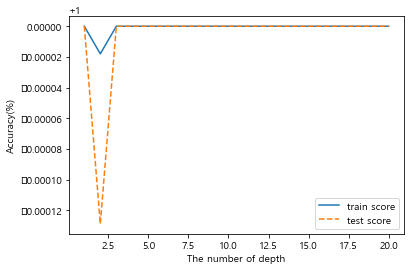

In [ ]:
# 기본데이터 + SMOTE

depth_min = 1
depth_max = 21
optimi_maxdepth(algorithm, algorithm_name, 
                  x2_train, y2_train, x2_test, y2_test, 
                depth_min, depth_max, 10)

## 모델 최적화: (3) 분리 노드의 최소 자료 수 선정

    min_samples_split  TrainScore  TestScore
0                   2         1.0        1.0
1                   4         1.0        1.0
2                   6         1.0        1.0
3                   8         1.0        1.0
4                  10         1.0        1.0
5                  12         1.0        1.0
6                  14         1.0        1.0
7                  16         1.0        1.0
8                  18         1.0        1.0
9                  20         1.0        1.0
10                 22         1.0        1.0
11                 24         1.0        1.0
12                 26         1.0        1.0
13                 28         1.0        1.0
14                 30         1.0        1.0
15                 32         1.0        1.0
16                 34         1.0        1.0
17                 36         1.0        1.0
18                 38         1.0        1.0
19                 40         1.0        1.0
20                 42         1.0        1.0
21        

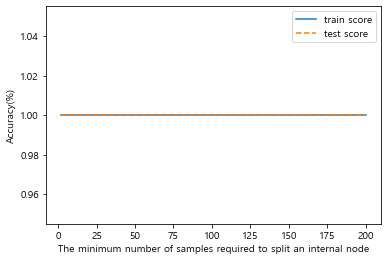

In [ ]:
# 원핫 인코딩 + SMOTE 

n_split_min = 1
n_split_max = 101
# 데이터프레임 행 최대 100개까지 반드시 출력
pd.set_option('display.max_row', 100)
optimi_minsplit (algorithm, algorithm_name,
                 x1_train, y1_train, x1_test, y1_test, 
                 
                 n_split_min, n_split_max, 10, None)

    min_samples_split  TrainScore  TestScore
0                   2         1.0     1.0000
1                   4         1.0     1.0000
2                   6         1.0     1.0000
3                   8         1.0     1.0000
4                  10         1.0     1.0000
5                  12         1.0     1.0000
6                  14         1.0     1.0000
7                  16         1.0     1.0000
8                  18         1.0     1.0000
9                  20         1.0     1.0000
10                 22         1.0     1.0000
11                 24         1.0     1.0000
12                 26         1.0     1.0000
13                 28         1.0     1.0000
14                 30         1.0     1.0000
15                 32         1.0     1.0000
16                 34         1.0     1.0000
17                 36         1.0     1.0000
18                 38         1.0     1.0000
19                 40         1.0     1.0000
20                 42         1.0     1.0000
21        

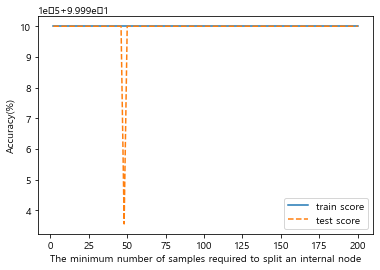

In [ ]:
# 원핫인코딩

n_split_min = 1
n_split_max = 101

optimi_minsplit (algorithm, algorithm_name,
                 X1_train_basic, y1_train_basic, x1_test, y1_test, 
                 
                 n_split_min, n_split_max, 10, None)

    min_samples_split  TrainScore  TestScore
0                   2         1.0        1.0
1                   4         1.0        1.0
2                   6         1.0        1.0
3                   8         1.0        1.0
4                  10         1.0        1.0
5                  12         1.0        1.0
6                  14         1.0        1.0
7                  16         1.0        1.0
8                  18         1.0        1.0
9                  20         1.0        1.0
10                 22         1.0        1.0
11                 24         1.0        1.0
12                 26         1.0        1.0
13                 28         1.0        1.0
14                 30         1.0        1.0
15                 32         1.0        1.0
16                 34         1.0        1.0
17                 36         1.0        1.0
18                 38         1.0        1.0
19                 40         1.0        1.0
20                 42         1.0        1.0
21        

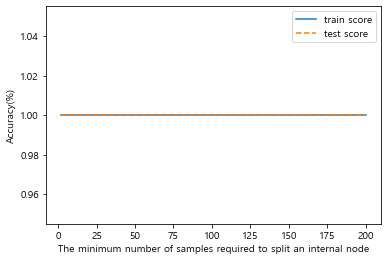

In [ ]:
# 기본데이터
optimi_minsplit (algorithm, algorithm_name,
                 X2_train_basic, y2_train_basic, x2_test, y2_test, 
                 
                 n_split_min, n_split_max, 10, None)

    min_samples_split  TrainScore  TestScore
0                   2         1.0        1.0
1                   4         1.0        1.0
2                   6         1.0        1.0
3                   8         1.0        1.0
4                  10         1.0        1.0
5                  12         1.0        1.0
6                  14         1.0        1.0
7                  16         1.0        1.0
8                  18         1.0        1.0
9                  20         1.0        1.0
10                 22         1.0        1.0
11                 24         1.0        1.0
12                 26         1.0        1.0
13                 28         1.0        1.0
14                 30         1.0        1.0
15                 32         1.0        1.0
16                 34         1.0        1.0
17                 36         1.0        1.0
18                 38         1.0        1.0
19                 40         1.0        1.0
20                 42         1.0        1.0
21        

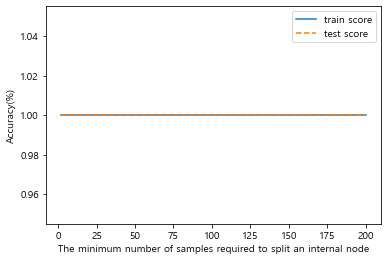

In [ ]:
# 기본 데이터 + SMOTE

optimi_minsplit (algorithm, algorithm_name,
                 x2_train, y2_train, x2_test, y2_test,
                 
                 n_split_min, n_split_max, 10, None)

## 모델 최적화: (4) 잎사귀 노드의 최소 자료 수 선정

    min_samples_leaf  TrainScore  TestScore
0                  2      1.0000     1.0000
1                  4      1.0000     1.0000
2                  6      1.0000     1.0000
3                  8      1.0000     1.0000
4                 10      1.0000     1.0000
5                 12      1.0000     0.9999
6                 14      1.0000     1.0000
7                 16      1.0000     1.0000
8                 18      1.0000     1.0000
9                 20      1.0000     1.0000
10                22      1.0000     1.0000
11                24      1.0000     0.9999
12                26      1.0000     1.0000
13                28      1.0000     0.9999
14                30      1.0000     1.0000
15                32      1.0000     1.0000
16                34      1.0000     0.9999
17                36      1.0000     1.0000
18                38      1.0000     0.9999
19                40      1.0000     1.0000
20                42      1.0000     1.0000
21                44      1.0000

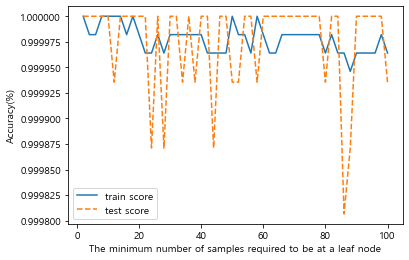

In [ ]:
# 원핫 인코딩 + SMOTE

n_leaf_min = 1
n_leaf_max = 51
optimi_minleaf(algorithm, algorithm_name, 
               x1_train, y1_train, x1_test, y1_test, 
               n_leaf_min, n_leaf_max, 10, None, 2)

    min_samples_leaf  TrainScore  TestScore
0                  2      1.0000     1.0000
1                  4      1.0000     1.0000
2                  6      1.0000     0.9999
3                  8      1.0000     1.0000
4                 10      1.0000     1.0000
5                 12      1.0000     1.0000
6                 14      1.0000     0.9999
7                 16      1.0000     1.0000
8                 18      1.0000     1.0000
9                 20      1.0000     1.0000
10                22      1.0000     1.0000
11                24      1.0000     1.0000
12                26      0.9999     0.9999
13                28      0.9999     1.0000
14                30      1.0000     0.9999
15                32      1.0000     1.0000
16                34      1.0000     1.0000
17                36      1.0000     0.9999
18                38      1.0000     0.9999
19                40      1.0000     0.9999
20                42      1.0000     0.9999
21                44      1.0000

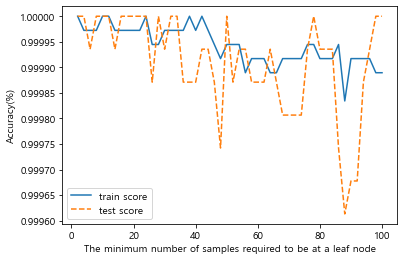

In [ ]:
# 원핫 인코딩

n_leaf_min = 1
n_leaf_max = 51
optimi_minleaf(algorithm, algorithm_name, 
                X1_train_basic, y1_train_basic, x1_test, y1_test,
               n_leaf_min, n_leaf_max, 10, None, 2)

    min_samples_leaf  TrainScore  TestScore
0                  2         1.0     1.0000
1                  4         1.0     1.0000
2                  6         1.0     1.0000
3                  8         1.0     1.0000
4                 10         1.0     1.0000
5                 12         1.0     1.0000
6                 14         1.0     1.0000
7                 16         1.0     1.0000
8                 18         1.0     1.0000
9                 20         1.0     1.0000
10                22         1.0     1.0000
11                24         1.0     0.9999
12                26         1.0     0.9999
13                28         1.0     1.0000
14                30         1.0     1.0000
15                32         1.0     1.0000
16                34         1.0     1.0000
17                36         1.0     1.0000
18                38         1.0     1.0000
19                40         1.0     1.0000
20                42         1.0     1.0000
21                44         1.0

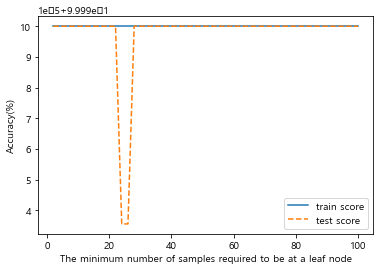

In [ ]:
# 기본 데이터

n_leaf_min = 1
n_leaf_max = 51
optimi_minleaf(algorithm, algorithm_name, 
                X2_train_basic, y2_train_basic, x2_test, y2_test,
               n_leaf_min, n_leaf_max, 10, None, 2)

    min_samples_leaf  TrainScore  TestScore
0                  2         1.0     1.0000
1                  4         1.0     1.0000
2                  6         1.0     1.0000
3                  8         1.0     1.0000
4                 10         1.0     1.0000
5                 12         1.0     1.0000
6                 14         1.0     1.0000
7                 16         1.0     1.0000
8                 18         1.0     1.0000
9                 20         1.0     1.0000
10                22         1.0     1.0000
11                24         1.0     1.0000
12                26         1.0     1.0000
13                28         1.0     1.0000
14                30         1.0     1.0000
15                32         1.0     1.0000
16                34         1.0     1.0000
17                36         1.0     1.0000
18                38         1.0     1.0000
19                40         1.0     1.0000
20                42         1.0     1.0000
21                44         1.0

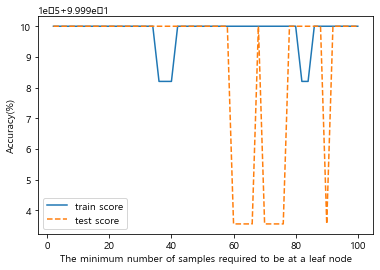

In [ ]:
# 기본 데이터+SMOTE

n_leaf_min = 1
n_leaf_max = 51
optimi_minleaf(algorithm, algorithm_name, 
                x2_train, y2_train, x2_test, y2_test,
               n_leaf_min, n_leaf_max, 10, None, 2)

# 4개 하이퍼 파라미터 설정해서 돌려보기

    min_samples_split  TrainScore  TestScore
0                   2      0.9994     0.9988
1                   4      0.9994     0.9988
2                   6      0.9994     0.9988
3                   8      0.9994     0.9988
4                  10      0.9994     0.9988
5                  12      0.9994     0.9988
6                  14      0.9994     0.9988
7                  16      0.9994     0.9988
8                  18      0.9994     0.9988
9                  20      0.9994     0.9988
10                 22      0.9994     0.9988
11                 24      0.9994     0.9988
12                 26      0.9994     0.9988
13                 28      0.9994     0.9988
14                 30      0.9994     0.9988
15                 32      0.9994     0.9988
16                 34      0.9994     0.9988
17                 36      0.9994     0.9988
18                 38      0.9994     0.9988
19                 40      0.9994     0.9988
20                 42      0.9994     0.9988
21        

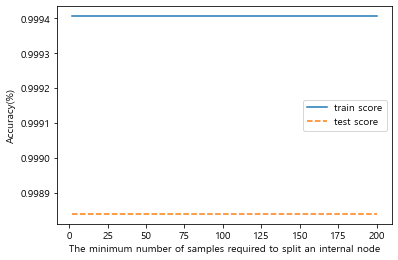

In [ ]:
# 원핫 인코딩 + SMOTE

# max_depth : 3


n_split_min = 1
n_split_max = 101
# 데이터프레임 행 최대 100개까지 반드시 출력
pd.set_option('display.max_row', 100)
optimi_minsplit (algorithm, algorithm_name,
                 x1_train, y1_train, x1_test, y1_test, 
                 
                 n_split_min, n_split_max, 10, 3 )

    min_samples_leaf  TrainScore  TestScore
0                  2      0.9994     0.9988
1                  4      0.9994     0.9988
2                  6      0.9994     0.9988
3                  8      0.9994     0.9988
4                 10      0.9994     0.9988
5                 12      0.9994     0.9988
6                 14      0.9994     0.9988
7                 16      0.9994     0.9988
8                 18      0.9994     0.9988
9                 20      0.9994     0.9988
10                22      0.9994     0.9988
11                24      0.9994     0.9988
12                26      0.9994     0.9988
13                28      0.9994     0.9988
14                30      0.9994     0.9988
15                32      0.9994     0.9988
16                34      0.9994     0.9988
17                36      0.9994     0.9988
18                38      0.9994     0.9988
19                40      0.9994     0.9988
20                42      0.9994     0.9988
21                44      0.9994

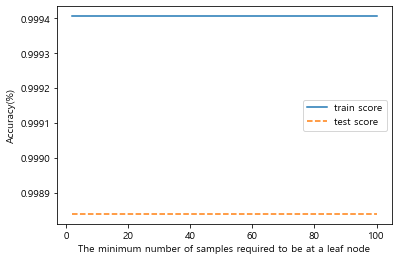

In [ ]:
n_leaf_min = 1
n_leaf_max = 51
optimi_minleaf(algorithm, algorithm_name, 
               x1_train, y1_train, x1_test, y1_test, 
               n_leaf_min, n_leaf_max, 10, 3, 2)